
Orijinal veri seti, Prof. Hofmann tarafından hazırlanan 20 kategorik/sembolik özelliğe sahip 1000 giriş içermektedir. Bu veri setinde her giriş, bir bankadan kredi alan bir kişiyi temsil etmektedir. Her kişi, bir dizi özelliğe göre iyi veya kötü kredi riski olarak sınıflandırılır. Orijinal veri setinin bağlantısını aşağıda bulabilirsiniz.
İçerik
Karmaşık kategori ve sembol sistemi nedeniyle orijinal veri setini anlamak neredeyse imkansızdır. Böylece, onu okunabilir bir CSV dosyasına dönüştürmek için küçük bir Python betiği yazdım. Birkaç sütun basitçe göz ardı ediliyor çünkü benim görüşüme göre ya önemli değiller ya da açıklamaları belirsiz. Seçilen nitelikler şunlardır:
Age: Yaş (sayısal)
Sex: Cinsiyet (metin: erkek, kadın)
Job: İş (sayısal: 0 - vasıfsız ve yerleşik olmayan, 1 - vasıfsız ve yerleşik, 2 - vasıflı, 3 - yüksek vasıflı)
Housing: Konut (metin: kendinize ait, kiralık veya ücretsiz)
Saving accounts: Hesapların kaydedilmesi (metin - az, orta, oldukça zengin, zengin)
Checking account: Vadesiz hesap (sayısal, DM - Alman Markı cinsinden)
Credit Amount: Kredi tutarı (sayısal, DM cinsinden)
Duration: Süre (sayısal, ay cinsinden)
Purpose: Amaç(metin: araba, mobilya/ekipman, radyo/TV, ev aletleri, onarımlar, eğitim, iş, tatil/diğerleri)
Risk: Risk (Değer hedefi - İyi veya Kötü Risk)

### Kütüphanelerin ve veri setinin içe aktarılması

In [1]:
#Library & Dataset

import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
df_credit = pd.read_csv("german_credit_data.csv")


### Keşifsel Veri Analizi

In [2]:
df_credit.drop('Unnamed: 0', axis=1,inplace=True)

In [3]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df_credit.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


### Data Description

In [5]:
print(df_credit.info())
df_credit.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB
None


Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

##### Bu veri setinde:

- Veri kümesinde 1000 satır ve 9 sütun var
- Tasarruf Hesabı ve Cari Hesap alanlarında boş veya NaN kayıtlar olduğunu görebiliyoruz.
- Tamsayı veri türünde 4 sütunumuz ve nesne veri türünde 5 sütunumuz var

In [6]:
# Verinin betimleyici istatistikleri

df_credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


In [7]:
df_credit.describe(include=['object']).T

,count,unique,top,freq
Sex,1000,2,male,690
Housing,1000,3,own,713
Saving accounts,817,4,little,603
Checking account,606,3,little,274
Purpose,1000,8,car,337
Risk,1000,2,good,700


In [8]:
#Benzersiz değerler

print(df_credit.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [9]:
# Eksik değerler

df_credit.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [10]:
df_credit["Saving accounts"].value_counts(dropna = False)

little        603
NaN           183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [11]:
df_credit["Checking account"].value_counts(dropna = False)

NaN         394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [12]:
#Eksik değerlerin mod yöntemiyle doldurulması


for column in df_credit.columns:
    df_credit[column].fillna(df_credit[column].mode()[0], inplace=True) 

In [13]:
# Eksik değerler

df_credit.isnull().sum().sort_values(ascending=False)

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [14]:
df_credit.duplicated().sum()

0

In [15]:
num = df_credit.select_dtypes(include='number').columns.tolist()
cat = df_credit.select_dtypes(include='object').columns.tolist()

In [16]:
num

['Age', 'Job', 'Credit amount', 'Duration']

### VERİ GÖRSELLEŞTİRME


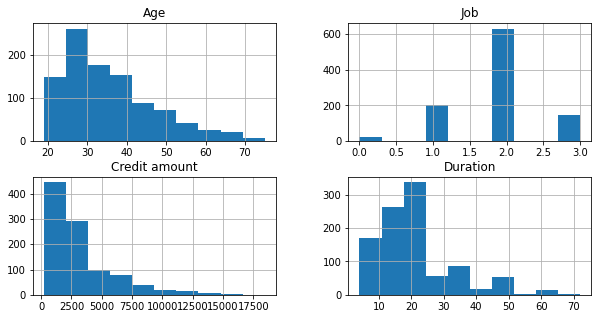

In [17]:
df_credit.hist(figsize=( 10 , 5 ));

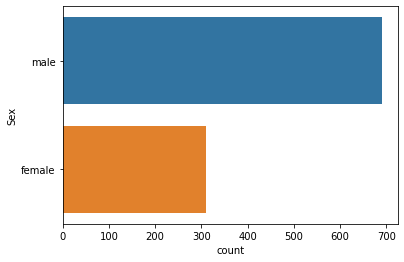

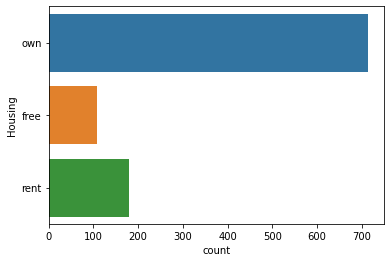

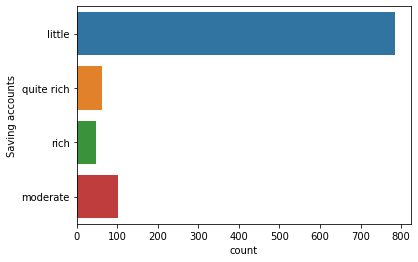

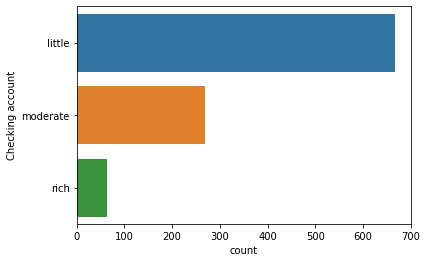

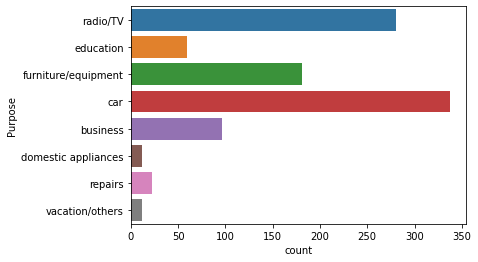

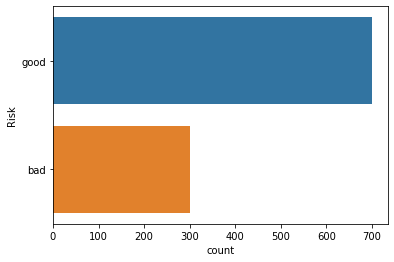

In [20]:
for col in df_credit[cat].columns:
    sns.countplot(y=col,data=df_credit)
    plt.show()

In [21]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter


trace0 = go.Bar(
    x = df_credit[df_credit["Risk"] == 'good' ]["Risk"].value_counts().index.values,
    y = df_credit[df_credit["Risk"] == 'good' ]["Risk"].value_counts().values,
    name= 'Good credit'
) 


trace1 = go.Bar(
     x = df_credit[df_credit["Risk"] == 'bad' ]["Risk"].value_counts().index.values,
     y = df_credit[df_credit["Risk"] == 'bad' ]["Risk"].value_counts().values,
     name= 'Bad credit'
)


data = [trace0, trace1]
layout= go.Layout(

)

layout = go.Layout(
    yaxis = dict(
        title='Count'
    ),
    xaxis = dict(
        title='Risk Variable'
    ),

    title='Target variable distribution'

) 
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')


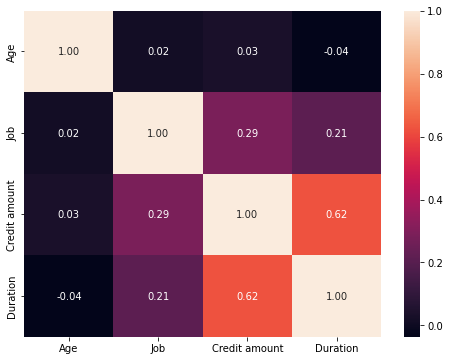

In [22]:
corr = df_credit.corr() 
plt.figure(figsize=( 8 , 6 )) 
sns.heatmap(corr,annot= True ,fmt= '.2f' ) 
plt.show()